In [ ]:
'''Cervical cancer tumor vs matched control data. Data set is gene expression profiling data from tumor and matched normal samples (29 each). The data are the raw read counts (not normalized) from sequencing of microRNA. This is not my data, but was published by:
Witten, D., et al. (2010) Ultra-high throughput sequencing-based small RNA discovery and discrete statistical biomarker analysis in a collection of cervical tumours and matched controls. BMC Biology, 8:58'''

#columns starting with N are Normal while others are Tumoral (T)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
file="cervical.csv"

In [11]:
df=pd.read_csv(file,index_col="ID")

In [12]:
print(df)
df.describe()

                    N1    N2    N3     N4    N5   N6  N7    N8    N9    N10  \
ID                                                                            
let-7a             865   810  5505   6692  1456  588   9  4513  1962  10167   
let-7a*              3    12    30     73     6    2   0   199    10    173   
let-7b             975  2790  4912  24286  1759  508  33  6162  1455  18110   
let-7b*             15    18    27    119    11    3   0   116    17    233   
let-7c             828  1251  2973   6413   713  339  23  2002   476   3294   
let-7c*              0     0     0      1     0    0   0     3     0      3   
let-7d              71    98   364   1890   188   47   1   719   204   1425   
let-7d*              3    24     8     41     8    2   0    38    18     77   
let-7e             169   151   788   5801   308  121   9  1912   204   2943   
let-7e*              0     1     1      7     1    0   0    14     1      4   
let-7f             569   192  3497  14486  1134  358

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,31.441176,55.739496,100.443978,310.252101,74.063025,12.810924,1.851541,174.994398,52.253501,211.316527,...,4.345938,1718.567227,4.922969,327.081232,10.778711,220.721289,380.570028,756.754902,9.457983,22.882353
std,262.065552,484.105064,609.156811,2392.597961,748.283024,101.468029,12.781268,1069.032153,334.290337,1248.231019,...,25.442385,18710.141487,29.580298,2199.100231,82.788643,1218.359639,2638.041467,5932.809917,57.687693,185.387771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,14.000000,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000
75%,2.000000,5.000000,7.000000,15.000000,7.000000,1.000000,0.000000,16.000000,4.000000,19.000000,...,1.000000,142.250000,1.000000,34.000000,1.000000,26.000000,27.000000,49.250000,1.000000,0.000000
max,6356.000000,11170.000000,11547.000000,51377.000000,17214.000000,2433.000000,298.000000,22869.000000,5122.000000,18110.000000,...,392.000000,476438.000000,502.000000,38519.000000,1309.000000,18032.000000,52071.000000,107857.000000,1046.000000,3014.000000


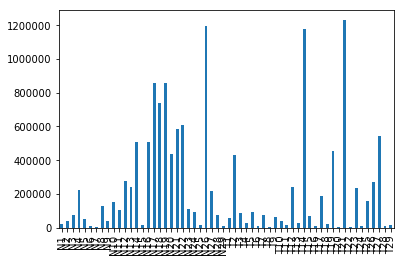

In [13]:
#Exploration
#pandas implementation of matplotlib
(df.sum()).plot.bar()
#sample sizes are very different

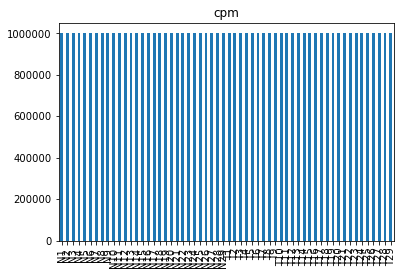

In [14]:
#cpm
cpm=df/df.sum()* 10**6
cpm.sum().plot.bar(title="cpm")


In [16]:
classes= np.array(['normal']*29 + ['tumor']*29)
classes

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor'], 
      dtype='<U6')

In [19]:
data=cpm.transpose()
data.sample(5)
#need to rescale the data to avoid overfitting

ID,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
T18,20902.501754,233.808744,30582.183774,374.093991,7341.594576,0.00000,9212.064531,187.046996,1683.422960,46.761749,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,46.761749,0.0,327.332242
T5,56381.137333,337.738000,48032.676151,306.075062,7103.052307,0.00000,1783.678811,21.108625,5403.807996,31.662937,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
T23,7373.595506,907.782954,121069.128528,809.297068,13389.798575,8.56399,10105.508358,149.869827,3476.979995,8.563990,...,0.0,0.0,0.0,4.281995,12.845985,0.0,0.0,0.000000,0.0,0.000000
T6,61621.468124,0.000000,139145.250603,709.924748,106346.727247,0.00000,1845.804345,283.969899,42453.499929,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
T28,29320.302088,2665.482008,99067.081297,592.329335,24729.749741,0.00000,3109.729009,296.164668,10217.681031,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [20]:
#with sklearn
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sk_data = sc.fit_transform(data)
print(sk_data)

[[ 0.16375984 -0.71724117 -0.8802064  ..., -0.28985132 -0.48013976
   0.7757562 ]
 [-0.53465168 -0.48861301 -0.09556051 ...,  0.81048475  4.80271218
  -0.25745491]
 [ 1.63243551 -0.3295706  -0.1429999  ..., -0.28985132 -0.48013976
   0.38938074]
 ..., 
 [ 1.47037637 -0.48589014  1.82419185 ...,  0.03433384  0.88175728
   0.04303552]
 [-0.19013223  2.73063234  0.75647656 ..., -0.28985132 -0.48013976
  -0.25745491]
 [ 2.02723696 -0.81587548  2.32918892 ..., -0.28985132 -0.48013976
  -0.25745491]]


In [ ]:
#manually
sc_data = (data-data.mean())/data.std(ddof=1)
print(sc_data)

In [28]:
from sklearn.model_selection import train_test_split

RANDOM_STATE=123454321
#prepare a 10% test #CROSS-validation later, set the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(sk_data, classes, test_size=0.10, random_state=RANDOM_STATE)

In [29]:
from sklearn import svm
sv = svm.SVC(C=1, kernel='linear')
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

1.0

In [30]:
#BOOTSTRAP AGGREGATING 

from sklearn.ensemble import BaggingClassifier
from sklearn import svm

sv = svm.SVC(C=1, kernel='linear')
#C is the penalty term
classifier = BaggingClassifier(base_estimator=sv, random_state=RANDOM_STATE)
#by default n_estimator = 10, max_samples = 1.0
classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=123454321, verbose=0, warm_start=False)

In [ ]:
pred=classifier.predict(X_test)

In [ ]:
#results: confusion matrix and accuracy
from sklearn.metrics import confusion_matrix as cm

print(cm(pred,y_test))

In [ ]:
print("Prediction Accuracy: {}%".format(classifier.score(X_test,y_test) *100))

In [ ]:
#but this is a single test. As bioinformaticians, we should always use CROSS-validation when possible
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv=StratifiedKFold(n_splits=10, random_state=RANDOM_STATE)
scores = cross_val_score(classifier, sc_data, classes, cv=cv)

In [ ]:
print("More Realistic Prediction Accuracy: {}%".format(scores.mean()*100))